# CNN (Convolutional neural network)
**useful for the unstructured data It is widely use for image classification and identification,object detection**
There are two main thing in the image classification
* Pixel
* Edge detection

**Relu activation function is more effective function for the image classification sigmoid function is use for black white image also tanh or softmax**

### Key Concept about CNN
* `Pooling :` It takes the subsample metrics through the inner or hidden layer of CNN and reduce the dimension of that metrics e.g the metrcs with dimention 3*4 pooling reduce it into the 2*3 metrics and gradually decrease it so in other word it is use as a dimensionalty reduction of metrics or also called feature selection in this method all the information always retain in the form of translation in varience
* `Activation function`

### From the blog information about the CNN
* **What is CNN:**
  Computer vision is evolving rapidly day by day. Its one of the reason is deep learning. When we talk about the computer vision a term `Convolutional neural network` comes in mind because CNN is heavily used here. Example of CNN in Computer vision are face recognition,image classification etc. It is similar to the basic neural network, CNN also have learnable parameter like a neural network weight and biase tc
* **Why should we use CNN**
  `Problem with Feedforward Neural Network ` Suppose you are working with MNIST dataset, you Know each image in 28*28*1 Total number of neurons in input layer will 28*28= 784, This can be manageabel , What if the size of image is 1000*1000 which mean you need 10^6 neurons in input layer. This seems a huge number of neurons are required for operation. it is computationaly ineffective right. So here comes Convolutional Neural Network or CNN, In simple word CNN extract the feature of image and convert it into lower dimention without loosing its characterstics. In the following example you can see that initial the size of image is 224*224*3. if you proceed without convolution then you need 100352 numbers of neurons in input layer but after applying convolution you input tensor dimension is reduced to 1*1*1000 it means you only need 1000 neurons in the first layer of feedforward neural network

 **Few Defination**
* Image representaion
  Thinking about the image, its easy to understand tah it has a height and width , so it would make sense to represent the information contained in it with a two dimensional structure (matrix) until you remembered that image have color and to add information about the color, Images are encoded into color channels the images data is represented into each color intensity in a color channel at a given point, The most common one being RGB,which means `Red,Green,Blue` so the intensity of the red channel at each point with width and height can be represented into a matrix, we end up having three matrics, and when these are combined they form a tensor 
* Edge Detection
  Every image has vertical and horizantal edge which actually combining to form a image . Convolution opertion is used with some fillters for the detecting edges.Suppose you have gray scale image with dimension 6*6 and filter we get 4*4(always take filter less than the dimension of image) 
e.g let's suppose our image dimension is 4*4 and filter is 3*3 we get the output after convolution is 2*2

SO if we have N*N image size adn F*F filter size then after convolutionresult will be 

(N*N) * (F*F) = (N-F+1)*(N-F+1) # this formula apply in CNN 

* Stride and Padding
  Stride denotes how many steps we are moving in each steps of Convolution. By default is one
  Padding is the way to highlight the information in the image to extract or read it through filter

  ## Layers in CNN
  1. Input Layer
  2. Convo layer (convo + ReLU)
  3. Pooling layer
  4. Fully connected lyer 
  5. Softmax/logistic layer
  6. Output layer
* Input layer
  Input layer in CNN should contain inmage data Image data is represented by three dimensional matrix. you need to reshape it into a single column. Suppose you have an image of dimmention 28*28=784 if you have m training example then dimension of input will be (784,m)
* Convo Layer 
  onvo layer is sometimes called feature extractor layer because feature of the image are get extracted within this layer. First of all, a part of image is connected to convo layer to perform convolutioanl opretion as Convo layer also contain ReLU activation to make all negative value to zero
* Pooling Layer
  Pooling layer is used to reduce the spatial volume of input image after convolution. it is used between two convolution layer . If we apply FC after convo layer without applying pooling or max pooling, Then it will be computatioinaly expensive and we don't want it So max pooling is only way to reduce the spatial volume of input image . The Pooling layer contain two hyperparameter Filter and Stride
* Fully connected Layer (FC)
  FC layer involves weights,biaseds,and neurons. it connect neurons in one layer to neurons in another layer, it used to classify images between different category by training
* Softmax/logistic layer 
  softmax layer is the last layer of CNN. It reside at the end of FC layer . It is used for binnar classification and softmax is for multi-classification
* Output Layer
* Output layer contain the label which is in the form of one hot encoded.
* 

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNist dataset

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# display the sample images

#plt.figure(figsize=(10,10))
#for i in range(25):
 #   plt.subplot(5,5,i+1)
  #  plt.xticks([])
   # plt.yticks([])
    #plt.grid(False)
  #  plt.imshow(X_train[i],cmap=plt.cm.binary)
    #plt.xlabel(y_train[i])
#plt.show()


In [2]:
# explore the data
print(f'we have {len(X_train)} images in the training set and {len(X_test)} images in the test set')
print(f'This size of the images is {X_train[0].shape}')

we have 60000 images in the training set and 10000 images in the test set
This size of the images is (28, 28)


In [3]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

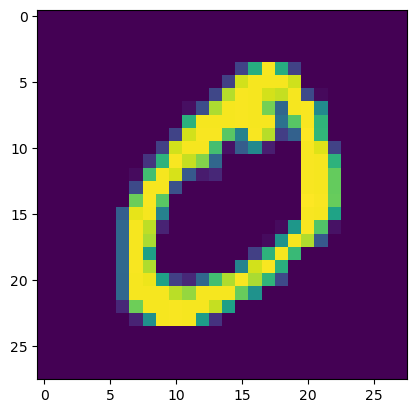

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

Text(0.5, 1.0, '5')

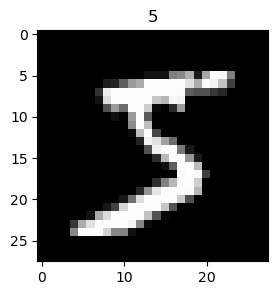

In [5]:
# show image in other form of color
plt.figure(figsize=(3,3))
plt.imshow(X_train[0],cmap='gray')
plt.title(y_train[0])

(-0.5, 27.5, 27.5, -0.5)

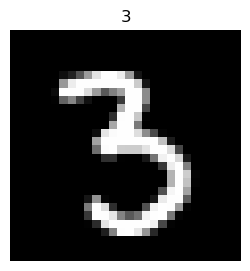

In [6]:
# Create Each time Random images
import random
random_image = random.randint(0,len(X_train))
plt.figure(figsize=(3,3))
plt.imshow(X_train[random_image],cmap='gray')
plt.title(y_train[random_image])
plt.axis(False)


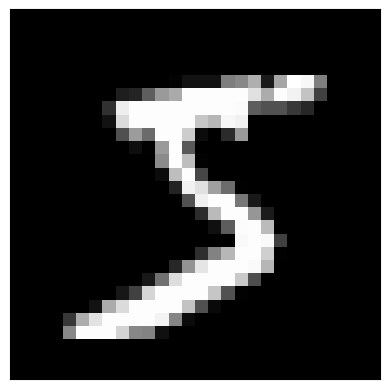

pixel values
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0

In [7]:
# Display the first images in the datasets as a data matrix
plt.imshow(X_train[0],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the value of each pixel in the images
print('pixel values')
for row in X_train[0]:
    for pixel in row:
        print('{:3}'.format(pixel),end=' ')
    print()

In [2]:
# Reshape the data as we do not have 3rd value of an image
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Normalize the data
Neural network tend to like normalized data and perform better on it. Normalization, in simple terms, means to have the data at the same scale that is in out case between 0 and 1

In [3]:
X_train = X_train / 255 # because 255 is the highest value in our pixel size
X_test = X_test / 255 

In [4]:
# also need to change the data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# So lets build the model 
import tensorflow as tf
from tensorflow.keras import layers

# create a input layer
input_layer = layers.Input(shape=(28,28,1)) # 28*28 pixel with 1 color channel (grayscale)

# Build the CNN model
model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'), # convolutional layer
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image 
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),

    layers.MaxPooling2D(), # pooling the above both layer

    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),    
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),

    layers.MaxPooling2D(),
    layers.Flatten(),

    layers.Dense(10,activation='softmax') # output layer 



])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                    

In [7]:
# compile the model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
# train the model 
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 181s 227ms/step - loss: 0.4289 - accuracy: 0.8681 - val_loss: 0.1446 - val_accuracy: 0.9559
Epoch 2/5
750/750 [==============================] - 144s 192ms/step - loss: 0.1372 - accuracy: 0.9589 - val_loss: 0.0976 - val_accuracy: 0.9727
Epoch 3/5
750/750 [==============================] - 136s 181ms/step - loss: 0.0959 - accuracy: 0.9706 - val_loss: 0.0762 - val_accuracy: 0.9777
Epoch 4/5
750/750 [==============================] - 137s 183ms/step - loss: 0.0762 - accuracy: 0.9769 - val_loss: 0.0720 - val_accuracy: 0.9793
Epoch 5/5
750/750 [==============================] - 148s 197ms/step - loss: 0.0641 - accuracy: 0.9805 - val_loss: 0.0658 - val_accuracy: 0.9801


In [9]:
# save the modol 
model.save('models/digit-recognizer.h5')